In [0]:
import torch

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

# Modelo pre-entrenado

---



In [0]:
inception = models.inception_v3(pretrained=True)

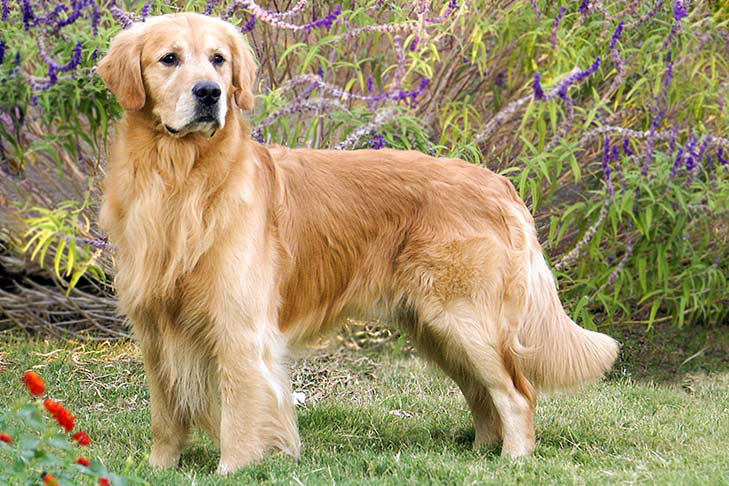

In [0]:
url = 'https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12130118/Golden-Retriever-Standing1.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [0]:
preprocess = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


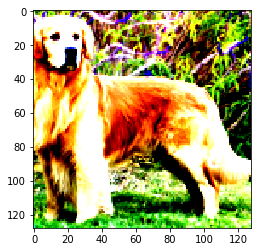

In [0]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1, 2, 0))

In [0]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [0]:
out = inception(batch)
out

tensor([[ 7.0589e+00,  8.7267e+00,  2.9900e-01,  2.4481e-01, -3.7255e+00,
         -1.0469e+00,  5.0048e+00,  3.7503e+00,  6.3489e+00, -3.1185e+00,
         -2.1716e+00,  7.4890e-01,  2.2191e+00,  2.1077e+00, -3.8949e+00,
         -2.7151e+00,  6.1993e-01,  1.6785e+00, -3.1210e+00, -1.0838e+00,
         -6.5115e+00, -3.9163e+00, -8.8885e-01,  3.1237e+00, -6.5669e+00,
         -1.5479e+00, -5.3936e+00, -4.0921e+00,  1.4406e+00, -1.0236e+00,
          4.4652e-01,  1.5212e+00, -3.1761e-01, -2.8055e+00,  2.0982e-01,
         -2.0071e+00,  1.4754e+00,  4.3145e+00,  2.5769e+00, -1.8380e+00,
         -2.2008e+00, -4.0636e+00, -5.3107e-01,  2.6973e+00, -4.7731e+00,
         -4.1551e+00, -5.3245e+00, -6.5205e+00,  9.0681e+00,  1.7532e+00,
         -2.9986e+00,  3.0758e+00, -8.8215e+00, -6.0542e+00, -1.0925e+01,
          2.5113e+00, -4.5745e+00, -2.7122e+00, -5.2418e+00, -2.8206e+00,
         -5.0303e+00,  3.9577e-01,  2.2741e+00, -3.3225e+00,  2.1211e-01,
         -5.7235e+00, -6.6317e+00,  2.

In [0]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [0]:
out

tensor([[ 7.0589e+00,  8.7267e+00,  2.9900e-01,  2.4481e-01, -3.7255e+00,
         -1.0469e+00,  5.0048e+00,  3.7503e+00,  6.3489e+00, -3.1185e+00,
         -2.1716e+00,  7.4890e-01,  2.2191e+00,  2.1077e+00, -3.8949e+00,
         -2.7151e+00,  6.1993e-01,  1.6785e+00, -3.1210e+00, -1.0838e+00,
         -6.5115e+00, -3.9163e+00, -8.8885e-01,  3.1237e+00, -6.5669e+00,
         -1.5479e+00, -5.3936e+00, -4.0921e+00,  1.4406e+00, -1.0236e+00,
          4.4652e-01,  1.5212e+00, -3.1761e-01, -2.8055e+00,  2.0982e-01,
         -2.0071e+00,  1.4754e+00,  4.3145e+00,  2.5769e+00, -1.8380e+00,
         -2.2008e+00, -4.0636e+00, -5.3107e-01,  2.6973e+00, -4.7731e+00,
         -4.1551e+00, -5.3245e+00, -6.5205e+00,  9.0681e+00,  1.7532e+00,
         -2.9986e+00,  3.0758e+00, -8.8215e+00, -6.0542e+00, -1.0925e+01,
          2.5113e+00, -4.5745e+00, -2.7122e+00, -5.2418e+00, -2.8206e+00,
         -5.0303e+00,  3.9577e-01,  2.2741e+00, -3.3225e+00,  2.1211e-01,
         -5.7235e+00, -6.6317e+00,  2.

In [0]:
_, index = torch.max(out, 1)

In [0]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 96.85728454589844)

In [0]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

golden retriever 96.85728454589844
Irish setter, red setter 2.6658689975738525
Saluki, gazelle hound 0.4674622416496277
Brittany spaniel 0.009116774424910545
cocker spaniel, English cocker spaniel, cocker 0.00017641938757151365


# Trabajando con un dataset

---



In [0]:
data_path = 'data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']


In [0]:
len(dataset)

50000

In [0]:
img, label = dataset[50]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FAB6004ED68>, 9, 'truck')

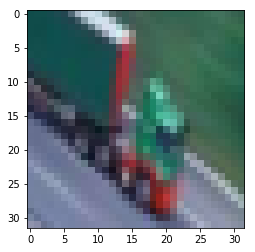

In [0]:
plt.imshow(img)

In [0]:
tensor_transform = transforms.ToTensor()

img_tensor = tensor_transform(img)

img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FAB6004ED68>,
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902, 0.2902, 0.2902,  ..., 0

In [0]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [0]:
img, label = dataset[50]
img

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

In [0]:
img.min(), img.max()

(tensor(0.0314), tensor(0.9529))

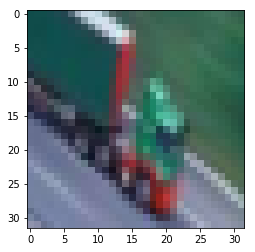

In [0]:
plt.imshow(img.permute(1, 2, 0))

In [0]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [0]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [0]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [0]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [0]:
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
              ])


In [0]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

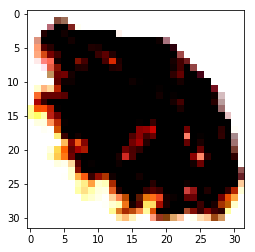

In [0]:
img_transformed,label = dataset[125]

plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]